# Einführung in die Programmierung für Studierende der Physik
# (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2025)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 22.12.2024

<H1>Die schwingende Kette</H1>

<p>
Das Projekt <i>Die schwingende Kette</i> ist ein Beispiel eines schwingenden, gekoppelten Massensystems und ein zentrales Problem aus der klassischen Mechanik (siehe Walter Greiner, 'Klassische Mechanik II' [8. Auflage, 2008, Kapitel I7. Seite 76]). Das System besteht aus einem masselosen Faden, der mit $N+1$ Massenpunkten (Dingen, Teilchen, Perlen) besetzt ist. Die $N+1$ 'Perlen' sollen in diesem Projekt als Objekte einer Klasse programmiert werden. Jede Perle besitzt eine ganzzahlige Instanzvariable $n$ (die Nummer der Perle), wobei die erste ($n=0$) und letzte Perle ($n=N+1$) so befestigt werden, dass sie sich nicht im Raum bewegen k&ouml;nnen. Beschreibt man das System im zweidimensionalen Raum und spannt die erste Perle bei ($x_0=0$ ,$y_0=0$) und die letzte Perle bei ($x_{N+1}=L$ ,$y_{N+1}=0$) ein, so soll eine &uuml;ber den gesamten Faden konstante Fadenspannung $T$ entstehen. Die Perlen seien in &auml;quidistanten Abst&auml;nden $a$ auf dem Faden angeordnet und die Auslenkung aus der Ruhelage in y-Richtung sei relativ klein, sodass die geringf&uuml;gige Auslenkung in x-Richtung zu vernachl&auml;ssigbar ist. Betrachten Sie somit zun&auml;chst den Fall einer ausschlie&szlig;lich vertikalen Auslenkung der Teilchen (Perlen).
</p>

<p>
Die y-Auslenkung des $n$-ten Teilchens $y_n$ wird durch die Auslenkung des ($n-1$)-ten Teilchens $y_{n-1}$ und des ($n+1$)-ten Teilchens $y_{n+1}$ beeinflusst. Die r&uuml;cktreibenden Kr&auml;fte $\vec{F}_{n-1}$ und $\vec{F}_{n+1}$ besitzen die folgende Form


\begin{eqnarray}
\vec{F}_{n-1} &=& - \left( T \cdot \hbox{sin}(\alpha_{n-1})  \right) \, \vec{e}_y \underbrace{\approx}_{\hbox{lineare Näherung}} - T \left( \frac{y_n - y_{n-1}}{a} \right) \, \vec{e}_y \\
\vec{F}_{n+1} &=& - \left( T \cdot \hbox{sin}(\alpha_{n+1})  \right) \, \vec{e}_y \underbrace{\approx}_{\hbox{lineare Näherung}}  - T \left( \frac{y_n - y_{n+1}}{a} \right) \, \vec{e}_y \quad ,
\end{eqnarray}


wobei $\alpha_{n-1}$ der mit der Horizontalen eingeschlossene Auslenkungswinkel zum ($n-1$)-ten Teilchen und $\alpha_{n+1}$ der Winkel zu seinem anderen Nachbarn, dem($n+1$)-ten Teilchen ist. Die Bewegungsgleichung des $n$-ten Teilchens in der linearen N&auml;herung lautet somit:


\begin{eqnarray}
m_n \, \frac{d^2 y_n}{dt^2} \, \vec{e}_y  = \vec{F}_{n-1} + \vec{F}_{n+1} &=& - T \left( \frac{y_n - y_{n-1}}{a} \right) \, \vec{e}_y - T \left( \frac{y_n - y_{n+1}}{a} \right) \, \vec{e}_y \qquad \Leftrightarrow \\
\frac{d^2 y_n(t)}{dt^2}   &=&  \frac{T}{m_n \, a}  \left( y_{n-1} - 2 \, y_n  +  y_{n+1} \right)  \quad ,
\end{eqnarray}

wobei $m_n$ die Masse des $n$-ten Teilchens ist und der Index $n$ von $n=1$ bis $n=N$ l&auml;uft. Die Bewegungsgleichung der <i>schwingenden Kette</i> stellt somit ein System von $N$ Differentialgleichungen zweiter Ordnung dar. Die Bewegungsgleichung f&uuml;r die erste und letzte freie Perle ($n=1$ und $n=N$) vereinfacht sich, da die ganz &auml;u&szlig;eren Eckperlen eingespannt sind (Randbedingung: $y_0(t)=0$ und $y_{N+1}(t)=0 \, , \,\, \forall \, t \in \,$&#8477;)


\begin{equation}
 \frac{d^2 y_1(t)}{dt^2} =  \frac{T}{m_1 \, a}  \left( - 2 \, y_1  +  y_{2} \right)  \qquad \hbox{und} \qquad
 \frac{d^2 y_N(t)}{dt^2} =  \frac{T}{m_N \, a}  \left( y_{N-1} - 2 \, y_N \right)  \quad .
\end{equation}

</p>

## Analytische Lösung des Problems 
### Beispiel: 3 Perlen

<p>
Bevor wir die numerische Lösung simulieren betrachten wir uns zunächst die allgemeine Lösung des Systems von gekoppelten DGLs am Beispiel einer schwingenden Kette mit drei Perlen ($N=3$).
</p>

In [1]:
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
init_printing()

Zunächst definieren wir uns das Systems von gekoppelten DGLs als sympy-Gleichung

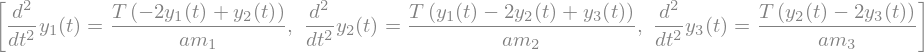

In [2]:
t= symbols('t',real=True)
m_1, m_2, m_3, a, T = symbols('m_1, m_2, m_3, a, T', positive = True, real = True)

y_1 = Function('y_1')(t)
y_2 = Function('y_2')(t)
y_3 = Function('y_3')(t)

EQ1 = Eq(y_1.diff(t).diff(t),T/(m_1*a)*(y_2 - 2*y_1))
EQ2 = Eq(y_2.diff(t).diff(t),T/(m_2*a)*(y_1 - 2*y_2 + y_3))
EQ3 = Eq(y_3.diff(t).diff(t),T/(m_3*a)*(y_2-2*y_3))
eqs_alg = [EQ1,EQ2,EQ3]
eqs_alg

Wir setzen im Folgenden der Einfachheit halber die Fadenspannung $T=1$ und die &auml;quidistanten Abst&auml;nde zwischen den Perlen auf $a=1$. Zusätzlich nehmen wir an, dass die Perlen alle die gleiche Masse hätten und setzen $m_1=m_2=m_3=1$.

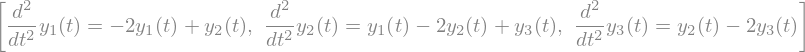

In [3]:
set_T = 1
set_a = 1
set_m_1 = 1
set_m_2 = 1
set_m_3 = 1
eqs = [EQ1.subs({(T,set_T),(a,set_a),(m_1,set_m_1)}),
       EQ2.subs({(T,set_T),(a,set_a),(m_2,set_m_2)}),
       EQ3.subs({(T,set_T),(a,set_a),(m_3,set_m_3)})]
eqs

Mittels des Befehls "dsolve_system()" bestimmen wir die allgemeine analytische Lösung des Systems von gekoppelten DGLs.

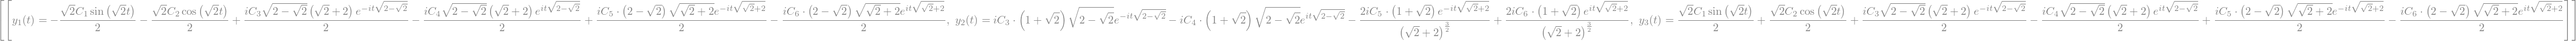

In [4]:
dsolve_system(eqs)

Die Konstante $C_1,C_2,C_3,C_4,C_5,C_6$ sind durch die sechs Anfangsbedingung (Anfangsorte und Anfangsgeschwindigkeiten der 3 Perlen) bestimmt: Wir setzen:
$y_1(0)=\alpha_1 , y_2(0)=\alpha_2 , y_3(0)=\alpha_3 , \dot{y}_1(0)=\alpha_4 ,\dot{y}_2(0)=\alpha_5$ und  $\dot{y}_3(0)=\alpha_6$. Die allgemeine analytische Lösung des Systems von gekoppelten DGLs ergibt sich dann wie folgt:

In [5]:
alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6 = symbols('alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6', real = True)
set_y1=alpha_1
set_y2=alpha_2
set_y3=alpha_3
set_y1_d=alpha_4
set_y2_d=alpha_5
set_y3_d=alpha_6
Loes_system=dsolve_system(eqs, ics={y_1.subs(t,0):set_y1,
                                    y_2.subs(t,0):set_y2,
                                    y_3.subs(t,0):set_y3,
                                    y_1.diff(t).subs(t,0):set_y1_d,
                                    y_2.diff(t).subs(t,0):set_y2_d,
                                    y_3.diff(t).subs(t,0):set_y3_d})

Die Realteile dieser speziellen Lösungen der drei Perlen lauten:

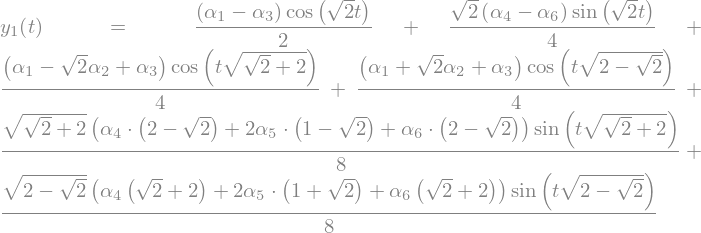

In [6]:
Loes_system3_y1=Eq(Loes_system[0][0].lhs,simplify(re(Loes_system[0][0].rhs)))
Loes_system3_y1

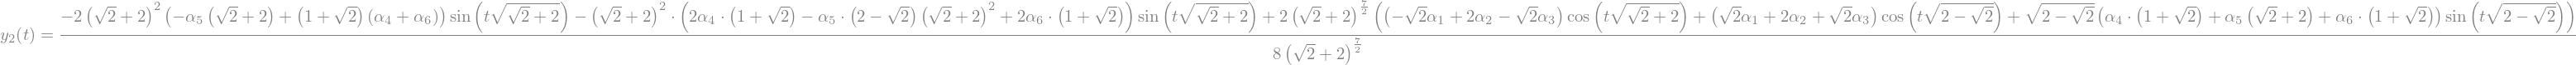

In [7]:
Loes_system3_y2=Eq(Loes_system[0][1].lhs,simplify(re(Loes_system[0][1].rhs)))
Loes_system3_y2

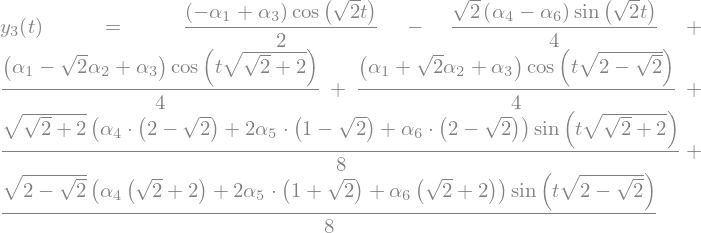

In [8]:
Loes_system3_y3=Eq(Loes_system[0][2].lhs,simplify(re(Loes_system[0][2].rhs)))
Loes_system3_y3

Diese allgemeine Lösungen können wir später zum Vergleich in unserem C++ Programm verwenden. Wir schreiben sie somit als C++-Ausdruck. Für die Lösung $y_1$ z.B.:

In [9]:
print(ccode(Loes_system3_y1.rhs))

(1.0/2.0)*(alpha_1 - alpha_3)*cos(M_SQRT2*t) + (1.0/4.0)*M_SQRT2*(alpha_4 - alpha_6)*sin(M_SQRT2*t) + (1.0/4.0)*(alpha_1 - M_SQRT2*alpha_2 + alpha_3)*cos(t*sqrt(M_SQRT2 + 2)) + (1.0/4.0)*(alpha_1 + M_SQRT2*alpha_2 + alpha_3)*cos(t*sqrt(2 - M_SQRT2)) + (1.0/8.0)*sqrt(M_SQRT2 + 2)*(alpha_4*(2 - M_SQRT2) + 2*alpha_5*(1 - M_SQRT2) + alpha_6*(2 - M_SQRT2))*sin(t*sqrt(M_SQRT2 + 2)) + (1.0/8.0)*sqrt(2 - M_SQRT2)*(alpha_4*(M_SQRT2 + 2) + 2*alpha_5*(1 + M_SQRT2) + alpha_6*(M_SQRT2 + 2))*sin(t*sqrt(2 - M_SQRT2))


Im Folgenden legen wir die Anfangsbedingungen wie folgt fest:
$y_1(0)=1 , y_2(0)=0 , y_3(0)=0 , \dot{y}_1(0)=0 ,\dot{y}_2(0)=0$ und  $\dot{y}_3(0)=0$.

Die spezielle analytische Lösung des Systems von gekoppelten DGLs ergibt sich zu:

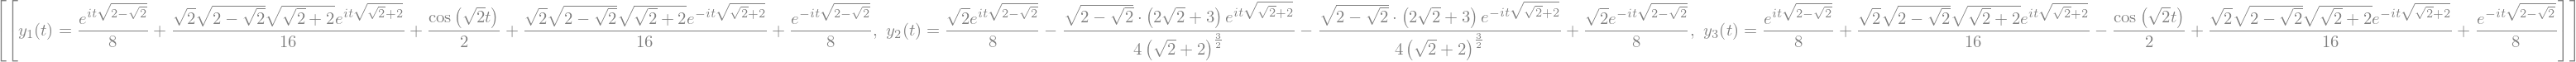

In [10]:
set_y1=1
set_y2=0
set_y3=0
set_y1_d=0
set_y2_d=0
set_y3_d=0
Loes_system=dsolve_system(eqs, ics={y_1.subs(t,0):set_y1,
                                    y_2.subs(t,0):set_y2,
                                    y_3.subs(t,0):set_y3,
                                    y_1.diff(t).subs(t,0):set_y1_d,
                                    y_2.diff(t).subs(t,0):set_y2_d,
                                    y_3.diff(t).subs(t,0):set_y3_d})
Loes_system

Die Realteile dieser speziellen Lösungen der drei Perlen lauten:

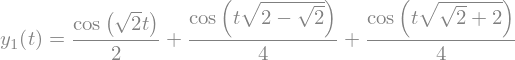

In [11]:
Loes_system3_y1=Eq(Loes_system[0][0].lhs,simplify(re(Loes_system[0][0].rhs)))
Loes_system3_y1

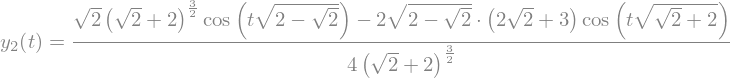

In [12]:
Loes_system3_y2=Eq(Loes_system[0][1].lhs,simplify(re(Loes_system[0][1].rhs)))
Loes_system3_y2

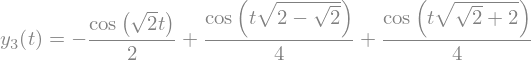

In [13]:
Loes_system3_y3=Eq(Loes_system[0][2].lhs,simplify(re(Loes_system[0][2].rhs)))
Loes_system3_y3

Wir stellen uns die berechneten analytische Lösungen dar:

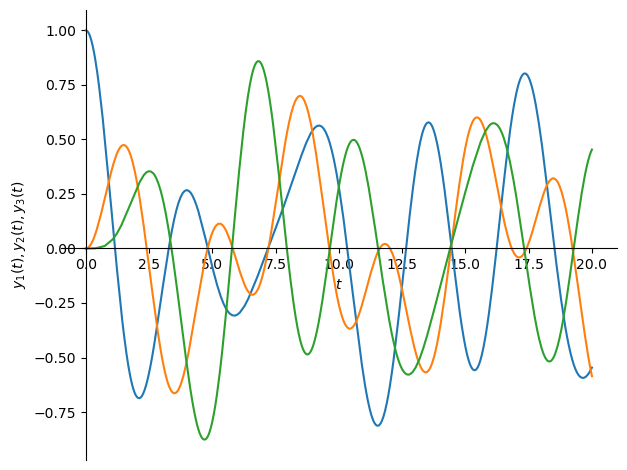

In [14]:
plot(re(Loes_system[0][0].rhs),re(Loes_system[0][1].rhs),re(Loes_system[0][2].rhs), (t, 0, 20),ylabel=r"$y_1(t),y_2(t),y_3(t)$");

Wir möchten nun die Bewegung der schwingenden Kette in einer Animation veranschaulichen. Wir erstellen diese Animation mittels des Python Moduls Matplotlib und benutzen hierbei die Funktion "FuncAnimation(...)" (siehe <A href="https://matplotlib.org/stable/users/explain/animations/animations.html" target="_blank">Animations using Matplotlib</A>).

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.animation as animation
from IPython.display import HTML

In [16]:
step = 0.1
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    y_1=N(re(Loes_system[0][0].rhs).subs(t,step*i))
    y_2=N(re(Loes_system[0][1].rhs).subs(t,step*i))
    y_3=N(re(Loes_system[0][2].rhs).subs(t,step*i))
    ax.scatter(1, y_1, s=140, marker='o', c="black")
    ax.scatter(2, y_2, s=140, marker='o', c="blue")
    ax.scatter(3, y_3, s=140, marker='o', c="green")
    ax.plot([0,1],[0,y_1],[1,2],[y_1,y_2],[2,3],[y_2,y_3],[3,4],[y_3,0], c="grey")
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

#### Bestimmung der Eigenfrequenzen und Eigenschwingungen

Im Folgenden möchten wir die Eigenfrequenzen und Eigenschwingungen der schwingenden Kette (drei Perlen) bestimmen. Eine Eigenschwingung der Kette liegt vor, wenn alle Perlen mit der gleichen Frequenz $\omega$ schwingen. Eine solche Schwingung liegt somit vor, falls die analytischen Lösungen die folgende Form besitzen:

\begin{equation}
y_1(t) = A \cdot \hbox{sin}(\omega \, t) \,\, , \quad 
y_2(t) = B \cdot \hbox{sin}(\omega \, t) \,\, , \quad
y_3(t) = C \cdot \hbox{sin}(\omega \, t)
\end{equation}

Wir setzen diesen Ansatz in das folgende System von gekoppelten DGLs ein

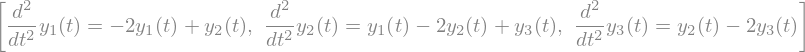

In [17]:
A, B, C, omega = symbols('A, B, C, omega', real = True)
eqs

und erhalten die folgenden drei Bestimmungsgleichungen der Eigenfrequenzen:

In [18]:
Eq1=eqs[0].subs({(y_1.diff(t).diff(t),-A*omega**2*sin(omega*t)),(y_2,B*sin(omega*t)),(y_1,A*sin(omega*t))})
Eq2=eqs[1].subs({(y_2.diff(t).diff(t),-B*omega**2*sin(omega*t)),(y_2,B*sin(omega*t)),(y_1,A*sin(omega*t)),(y_3,C*sin(omega*t))})
Eq3=eqs[2].subs({(y_3.diff(t).diff(t),-C*omega**2*sin(omega*t)),(y_2,B*sin(omega*t)),(y_3,C*sin(omega*t))})
{Eq1,Eq2,Eq3}

Es ergeben sich die folgenden Lösungen des Gleichungssystems:

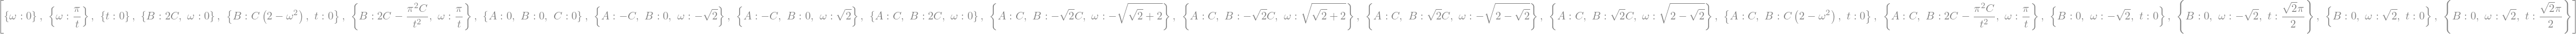

In [19]:
Loes_Eigen=solve({Eq1,Eq2,Eq3})
Loes_Eigen

##### 1.  Eigenfrequenz / Eigenschwingung

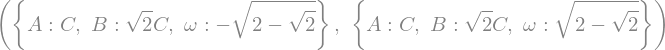

In [20]:
Loes_Eigen[12],Loes_Eigen[13]

In [21]:
N(Loes_Eigen[13][omega])

In [22]:
set_y1=0.7
set_y2=sqrt(2)*0.7
set_y3=0.7
set_y1_d=0
set_y2_d=0
set_y3_d=0
Loes_system=dsolve_system(eqs, ics={y_1.subs(t,0):set_y1,
                                    y_2.subs(t,0):set_y2,
                                    y_3.subs(t,0):set_y3,
                                    y_1.diff(t).subs(t,0):set_y1_d,
                                    y_2.diff(t).subs(t,0):set_y2_d,
                                    y_3.diff(t).subs(t,0):set_y3_d})

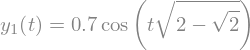

In [23]:
Eq(Loes_system[0][0].lhs,simplify(N(re(Loes_system[0][0].rhs))))

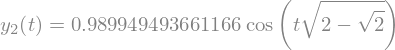

In [24]:
Eq(Loes_system[0][1].lhs,simplify(N(re(Loes_system[0][1].rhs))))

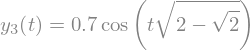

In [25]:
Eq(Loes_system[0][2].lhs,simplify(N(re(Loes_system[0][2].rhs))))

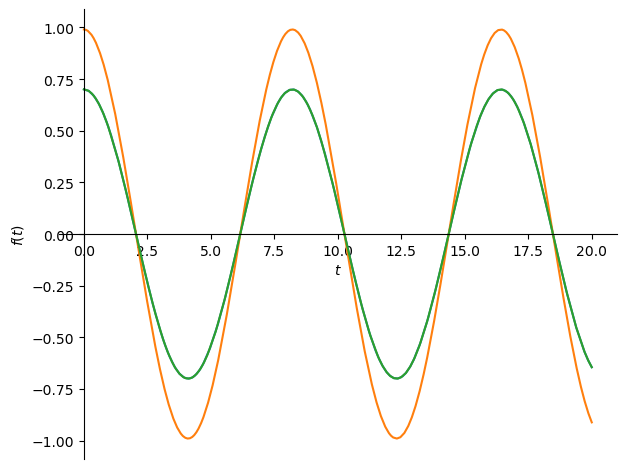

In [26]:
plot(re(Loes_system[0][0].rhs),re(Loes_system[0][1].rhs),re(Loes_system[0][2].rhs), (t, 0, 20));

In [27]:
step = 0.1
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    y_1=N(re(Loes_system[0][0].rhs).subs(t,step*i))
    y_2=N(re(Loes_system[0][1].rhs).subs(t,step*i))
    y_3=N(re(Loes_system[0][2].rhs).subs(t,step*i))
    ax.scatter(1, y_1, s=140, marker='o', c="black")
    ax.scatter(2, y_2, s=140, marker='o', c="blue")
    ax.scatter(3, y_3, s=140, marker='o', c="green")
    ax.plot([0,1],[0,y_1],[1,2],[y_1,y_2],[2,3],[y_2,y_3],[3,4],[y_3,0], c="grey")
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

##### 2.  Eigenfrequenz / Eigenschwingung

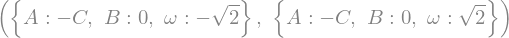

In [28]:
Loes_Eigen[7],Loes_Eigen[8]

In [29]:
N(Loes_Eigen[8][omega])

In [30]:
set_y1=1
set_y2=0
set_y3=-1
set_y1_d=0
set_y2_d=0
set_y3_d=0
Loes_system=dsolve_system(eqs, ics={y_1.subs(t,0):set_y1,
                                    y_2.subs(t,0):set_y2,
                                    y_3.subs(t,0):set_y3,
                                    y_1.diff(t).subs(t,0):set_y1_d,
                                    y_2.diff(t).subs(t,0):set_y2_d,
                                    y_3.diff(t).subs(t,0):set_y3_d})

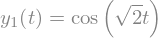

In [31]:
Eq(Loes_system[0][0].lhs,simplify(N(re(Loes_system[0][0].rhs))))

In [32]:
Eq(Loes_system[0][1].lhs,simplify(N(re(Loes_system[0][1].rhs))))

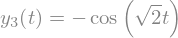

In [33]:
Eq(Loes_system[0][2].lhs,simplify(N(re(Loes_system[0][2].rhs))))

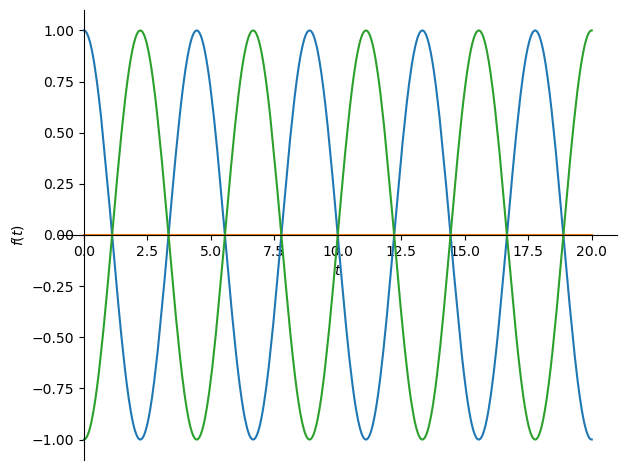

In [34]:
plot(re(Loes_system[0][0].rhs),re(Loes_system[0][1].rhs),re(Loes_system[0][2].rhs), (t, 0, 20));

In [35]:
step = 0.1
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    y_1=N(re(Loes_system[0][0].rhs).subs(t,step*i))
    y_2=N(re(Loes_system[0][1].rhs).subs(t,step*i))
    y_3=N(re(Loes_system[0][2].rhs).subs(t,step*i))
    ax.scatter(1, y_1, s=140, marker='o', c="black")
    ax.scatter(2, y_2, s=140, marker='o', c="blue")
    ax.scatter(3, y_3, s=140, marker='o', c="green")
    ax.plot([0,1],[0,y_1],[1,2],[y_1,y_2],[2,3],[y_2,y_3],[3,4],[y_3,0], c="grey")
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

##### 3.  Eigenfrequenz / Eigenschwingung

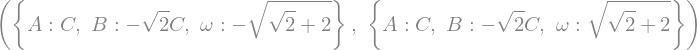

In [36]:
Loes_Eigen[10],Loes_Eigen[11]

In [37]:
N(Loes_Eigen[11][omega])

In [38]:
set_y1=0.7
set_y2=-sqrt(2)*0.7
set_y3=0.7
set_y1_d=0
set_y2_d=0
set_y3_d=0
Loes_system=dsolve_system(eqs, ics={y_1.subs(t,0):set_y1,
                                    y_2.subs(t,0):set_y2,
                                    y_3.subs(t,0):set_y3,
                                    y_1.diff(t).subs(t,0):set_y1_d,
                                    y_2.diff(t).subs(t,0):set_y2_d,
                                    y_3.diff(t).subs(t,0):set_y3_d})

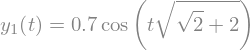

In [39]:
Eq(Loes_system[0][0].lhs,simplify(N(re(Loes_system[0][0].rhs))))

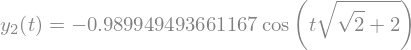

In [40]:
Eq(Loes_system[0][1].lhs,simplify(N(re(Loes_system[0][1].rhs))))

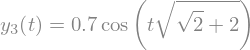

In [41]:
Eq(Loes_system[0][2].lhs,simplify(N(re(Loes_system[0][2].rhs))))

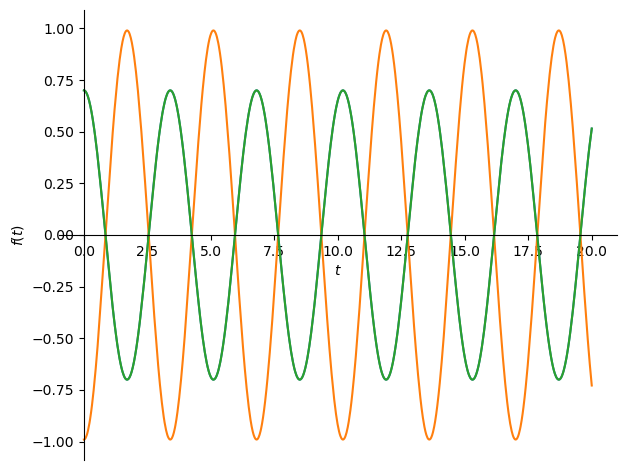

In [42]:
plot(re(Loes_system[0][0].rhs),re(Loes_system[0][1].rhs),re(Loes_system[0][2].rhs), (t, 0, 20));

In [43]:
step = 0.1
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    y_1=N(re(Loes_system[0][0].rhs).subs(t,step*i))
    y_2=N(re(Loes_system[0][1].rhs).subs(t,step*i))
    y_3=N(re(Loes_system[0][2].rhs).subs(t,step*i))
    ax.scatter(1, y_1, s=140, marker='o', c="black")
    ax.scatter(2, y_2, s=140, marker='o', c="blue")
    ax.scatter(3, y_3, s=140, marker='o', c="green")
    ax.plot([0,1],[0,y_1],[1,2],[y_1,y_2],[2,3],[y_2,y_3],[3,4],[y_3,0], c="grey")
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

### Beispiel: 5 Perlen

<p>
Wir uns nun die allgemeine Lösung einer schwingenden Kette mit fünf Perlen ($N=5$). Der Einfachheit halber setzen wir im Folgenden wieder die Fadenspannung $T=1$ und die &auml;quidistanten Abst&auml;nde zwischen den Perlen auf $a=1$. Zusätzlich nehmen wir an, dass die Perlen alle die gleiche Masse hätten und setzen $m_n = 1$, $\forall n \in [1,5]$.
</p>

In [44]:
N=5
y=[0]
m=[0]
set_m=[0,]
for i in range(1,N+1):
    set_string="y_"+str(i)
    y.append(Function(set_string)(t))
    set_string="m_"+str(i)
    m.append(symbols(set_string, positive = True, real = True))
    set_m.append(1)
y.append(0)
m.append(0)
set_m.append(0)

In [45]:
set_T = 1
set_a = 1
eqs=[]
set_eqs=[]
for n in range(1,N+1):
    eqs.append(Eq(y[n].diff(t).diff(t),T/(m[n]*a)*(y[n-1] - 2*y[n] + y[n+1])))
    set_eqs.append(Eq(y[n].diff(t).diff(t),set_T/(set_m[n]*set_a)*(y[n-1] - 2*y[n] + y[n+1])))

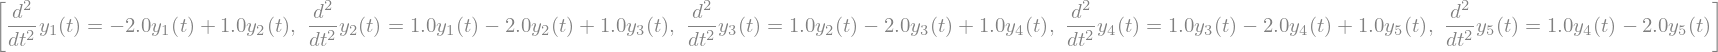

In [46]:
set_eqs

Mittels des Befehls "dsolve_system()" bestimmen wir die allgemeine analytische Lösung des Systems von gekoppelten DGLs.

In [47]:
dsolve_system(set_eqs)

Die 10 Konstanten $C_i$ sind durch die 10 Anfangsbedingung (Anfangsorte und Anfangsgeschwindigkeiten der 5 Perlen) bestimmt. Wir legen z.B. die folgenden Anfangsbedingungen fest:
$y_1(0)=1 , y_2(0)=0, ... , y_5(0)=0 , \dot{y}_1(0)=0 ,\dot{y}_2(0)=0, ..., \dot{y}_5(0)=0$.

Die spezielle analytische Lösung des Systems von gekoppelten DGLs ergibt sich dann wie folgt:

In [48]:
set_ics={}
for n in range(1,N+1):
    set_val=0
    if n==1:
        set_val=1
    set_ics[y[n].subs(t,0)]=set_val
    set_ics[y[n].diff(t).subs(t,0)]=0
Loes_system=dsolve_system(set_eqs, ics=set_ics)

Der Realteil dieser speziellen Lösung der ersten Perle lautet:

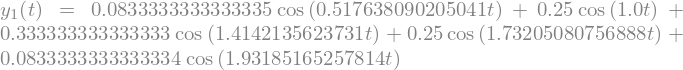

In [49]:
Eq(Loes_system[0][0].lhs,simplify(re(Loes_system[0][0].rhs)))

Der Realteil der fünften Perle lautet:

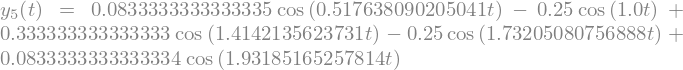

In [50]:
Eq(Loes_system[0][4].lhs,simplify(re(Loes_system[0][4].rhs)))

Wir veranschaulichen die Bewegung der schwingenden Kette wieder in einer Animation.

In [51]:
step = 0.1
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,float(re(Loes_system[0][0].rhs).subs(t,step*i))], c="grey")
    ax.plot([N,N+1],[float(re(Loes_system[0][N-1].rhs).subs(t,step*i)),0], c="grey")
    ax.scatter(N, float(re(Loes_system[0][N-1].rhs).subs(t,step*i)), s=140, marker='o', c="blue")
    for n in range(1,N):
        ax.scatter(n, float(re(Loes_system[0][n-1].rhs).subs(t,step*i)), s=140, marker='o', c="blue")
        ax.plot([n,n+1],[float(re(Loes_system[0][n-1].rhs).subs(t,step*i)),float(re(Loes_system[0][n].rhs).subs(t,step*i))], c="grey")
    ax.set_xlim(0, N+1)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

#### Bestimmung der Eigenfrequenzen und Eigenschwingungen

Wir möchten nun wieder die Eigenfrequenzen und Eigenschwingungen der schwingenden Kette (fünf Perlen) bestimmen und gehen dabei wie in dem Fall mit drei Perlen vor.

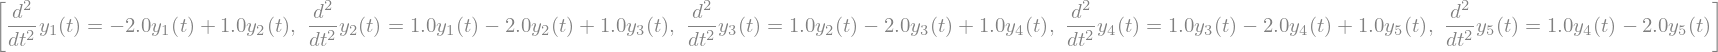

In [52]:
set_eqs

In [53]:
D, E = symbols('D, E', real = True)
Eq1=set_eqs[0].subs({(y[1].diff(t).diff(t),-A*omega**2*sin(omega*t)),(y[2],B*sin(omega*t)),(y[1],A*sin(omega*t))})
Eq2=set_eqs[1].subs({(y[2].diff(t).diff(t),-B*omega**2*sin(omega*t)),(y[1],A*sin(omega*t)),(y[2],B*sin(omega*t)),(y[3],C*sin(omega*t))})
Eq3=set_eqs[2].subs({(y[3].diff(t).diff(t),-C*omega**2*sin(omega*t)),(y[2],B*sin(omega*t)),(y[3],C*sin(omega*t)),(y[4],D*sin(omega*t))})
Eq4=set_eqs[3].subs({(y[4].diff(t).diff(t),-D*omega**2*sin(omega*t)),(y[3],C*sin(omega*t)),(y[4],D*sin(omega*t)),(y[5],E*sin(omega*t))})
Eq5=set_eqs[4].subs({(y[5].diff(t).diff(t),-E*omega**2*sin(omega*t)),(y[4],D*sin(omega*t)),(y[5],E*sin(omega*t))})
{Eq1,Eq2,Eq3,Eq4,Eq5}

Die oberen fünf Gleichungen stellen die Bestimmungsgleichungen der Eigenfrequenzen dar. Es ergeben sich die folgenden Lösungen des Gleichungssystems:

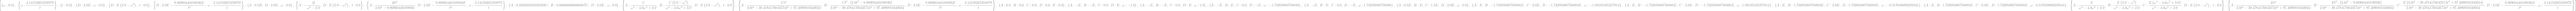

In [54]:
Loes_Eigen=solve({Eq1,Eq2,Eq3,Eq4,Eq5})
Loes_Eigen

Im Folgenden stellen wir zwei dieser Eigenschwingung dar.

##### 1.  Eigenfrequenz / Eigenschwingung

In [55]:
Loes_Eigen[20],Loes_Eigen[21]

In [56]:
set_A=0.5
set_ics={y[1].subs(t,0):set_A,
         y[2].subs(t,0):1.73205080756888*set_A,
         y[3].subs(t,0):2*set_A,
         y[4].subs(t,0):1.73205080756888*set_A,
         y[5].subs(t,0):set_A,
         y[1].diff(t).subs(t,0):0,
         y[2].diff(t).subs(t,0):0,
         y[3].diff(t).subs(t,0):0,
         y[4].diff(t).subs(t,0):0,
         y[5].diff(t).subs(t,0):0}
Loes_system=dsolve_system(set_eqs, ics=set_ics)
Loes_system

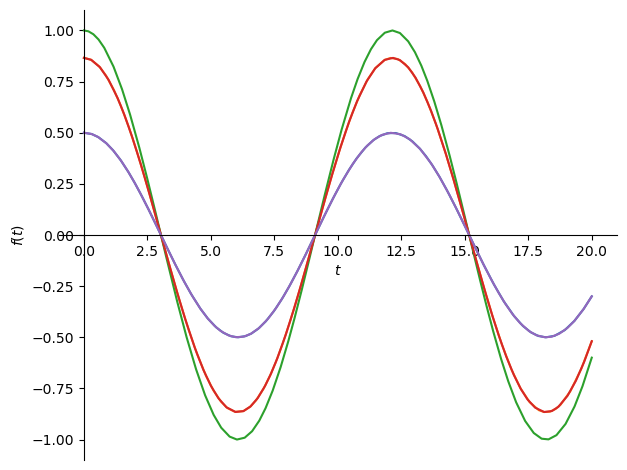

In [57]:
plot(re(Loes_system[0][0].rhs),re(Loes_system[0][1].rhs),re(Loes_system[0][2].rhs),re(Loes_system[0][3].rhs),re(Loes_system[0][4].rhs), (t, 0, 20));

In [58]:
step = 0.1
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,float(re(Loes_system[0][0].rhs).subs(t,step*i))], c="grey")
    ax.plot([N,N+1],[float(re(Loes_system[0][N-1].rhs).subs(t,step*i)),0], c="grey")
    ax.scatter(N, float(re(Loes_system[0][N-1].rhs).subs(t,step*i)), s=140, marker='o', c="blue")
    for n in range(1,N):
        ax.scatter(n, float(re(Loes_system[0][n-1].rhs).subs(t,step*i)), s=140, marker='o', c="blue")
        ax.plot([n,n+1],[float(re(Loes_system[0][n-1].rhs).subs(t,step*i)),float(re(Loes_system[0][n].rhs).subs(t,step*i))], c="grey")
    ax.set_xlim(0, N+1)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

##### 2.  Eigenfrequenz / Eigenschwingung

In [59]:
Loes_Eigen[18],Loes_Eigen[19]

In [60]:
set_A=0.5
set_ics={y[1].subs(t,0):set_A,
         y[2].subs(t,0):-1.73205080756888*set_A,
         y[3].subs(t,0):2*set_A,
         y[4].subs(t,0):-1.73205080756888*set_A,
         y[5].subs(t,0):set_A,
         y[1].diff(t).subs(t,0):0,
         y[2].diff(t).subs(t,0):0,
         y[3].diff(t).subs(t,0):0,
         y[4].diff(t).subs(t,0):0,
         y[5].diff(t).subs(t,0):0}
Loes_system=dsolve_system(set_eqs, ics=set_ics)
Loes_system

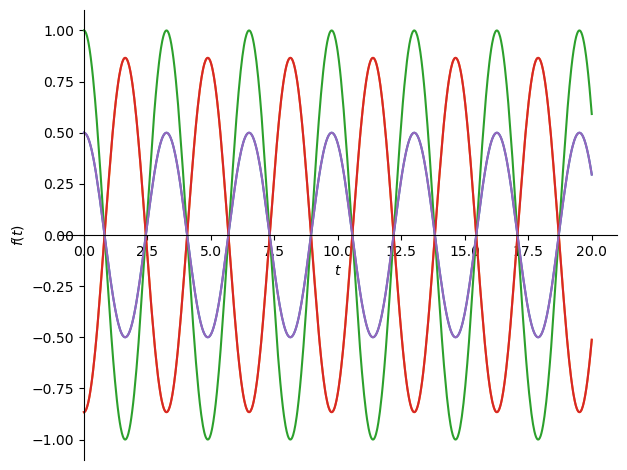

In [61]:
plot(re(Loes_system[0][0].rhs),re(Loes_system[0][1].rhs),re(Loes_system[0][2].rhs),re(Loes_system[0][3].rhs),re(Loes_system[0][4].rhs), (t, 0, 20));

In [62]:
step = 0.1
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,float(re(Loes_system[0][0].rhs).subs(t,step*i))], c="grey")
    ax.plot([N,N+1],[float(re(Loes_system[0][N-1].rhs).subs(t,step*i)),0], c="grey")
    ax.scatter(N, float(re(Loes_system[0][N-1].rhs).subs(t,step*i)), s=140, marker='o', c="blue")
    for n in range(1,N):
        ax.scatter(n, float(re(Loes_system[0][n-1].rhs).subs(t,step*i)), s=140, marker='o', c="blue")
        ax.plot([n,n+1],[float(re(Loes_system[0][n-1].rhs).subs(t,step*i)),float(re(Loes_system[0][n].rhs).subs(t,step*i))], c="grey")
    ax.set_xlim(0, N+1)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

## Numerische Lösung des Problems 


Wir berechnen nun die numerische Lösung der schwingenden Kette bestehend aus einer beliebigen Anzahl $N$ von Perlen.

### Umschreiben der Bewegungsgleichung

<p>
Zunächst schreiben wir das System von $N$ Bewegungsgleichung zweiter Ordnung in ein System von $2 N$ Differentialgleichungen erster Ordnung um.
</p>

Unser Differentialgleichung zweiter Ordnung lautet


\begin{equation}
\frac{d^2 y_n(t)}{dt^2}   =  \frac{T}{m_n \, a}  \left( y_{n-1}(t) - 2 \, y_n(t)  +  y_{n+1}(t) \right) \,\, \quad  \hbox{bzw.} \quad  \ddot{y_n}  = \frac{T}{m_n \, a}  \left( y_{n-1} - 2 \, y_n  +  y_{n+1} \right) =: f_n(y_{n-1},y_n,y_{n+1}) \quad,
\end{equation}

wobei $n \in [1,N]$. Die befestigten Eckpunkte (Eckperlen) der schwingenden Kette werden durch $n=0$ und $n=N+1$ beschrieben. 

Wir machen die vorgegebene Variablenumbenennung ($u_n(t)=y_n(t)$, $u_{N+n}(t)=\dot{y_n}(t)$) und definieren das System von DGLs wie folgt:


\begin{eqnarray}
&\dot{u_1}(t) = \frac{d u_1}{dt} = \frac{d y_1}{dt} = u_{N+1}(t)& \\
&\dot{u_2}(t) = \frac{d u_2}{dt} = \frac{d y_2}{dt} = u_{N+2}(t) &\\
&... = ... &\\
&\dot{u_N}(t) = \frac{d u_N}{dt} = \frac{d y_N}{dt} = u_{2N}(t) &\\
&\dot{u}_{N+1}(t) = \frac{d u_{N+1}}{dt} = \frac{d \dot{y_1}}{dt} = \ddot{y_1}(t) =: f_1(y_{0},y_1,y_{2}) = f_1(u_{0},u_1,u_{2})&\\
&\dot{u}_{N+2}(t) = \frac{d u_{N+2}}{dt} = \frac{d \dot{y_2}}{dt} = \ddot{y_2}(t) =: f_2(y_{1},y_2,y_{3}) = f_2(u_{1},u_2,u_{3})&\\
&... = ... &\\
&\dot{u}_{2N}(t) = \frac{d u_{2N}}{dt} = \frac{d \dot{y_N}}{dt} = \ddot{y_N}(t) =: f_N(y_{N-1},y_N,y_{N+1}) = f_2(u_{N-1},u_N,u_{2N+1})& \quad ,
\end{eqnarray}

wobei die befestigten Eckpunkte (Eckperlen) der schwingenden Kette durch $u_{0}$ und $u_{2N+1}$ beschrieben werden. 

Wir berechnen nun die numerische Lösung $\vec{u}(t) = \left( u_1(t), u_2(t), ..., u_{2N}(t)  \right)$ im Zeitintervall $t \in [0,1]$ bei vorgegebenen Anfangsbedingungen

$$
\begin{eqnarray}
&u_n(0) = y_n(0) = \alpha_n \,\, , \forall n \in [1,N] & \\
&u_n(0) = \dot{y}_{n-N}(0) = \alpha_n \,\, , \forall n \in [N+1,2N] & 
\end{eqnarray}
$$

Wir betrachten zunächst die Fälle einer Kette bestehend aus drei und fünf Perlen.

### Beispiel: 3 Perlen

Zum numerischen Lösen benutzen wir das Python-Modul <A href="https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide" target="_blank">SciPy</A>, welches eine breite Kollektion von mathematischen Algorithmen und Funktionen bereitstellt. Im Speziellen werden wir in diesem Semester die Funktion <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp" target="_blank">'solve_ivp(...)'</A> verwenden, die sich im Untermodul <A href="https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" target="_blank">'scipy.integrate'</A> befindet, welches Funktionen zum Lösen von gewöhnlichen Differentialgleichungen bereitstellt.

In [63]:
from scipy.integrate import solve_ivp

Wir setzen im Folgenden wieder die Fadenspannung $T=1$ und die &auml;quidistanten Abst&auml;nde zwischen den Perlen auf $a=1$. Zusätzlich nehmen wir auch an, dass die Perlen alle die gleiche Masse hätten und setzen $m_1=m_2=m_3=1$.

In [64]:
set_T = 1
set_a = 1
set_m_1 = 1
set_m_2 = 1
set_m_3 = 1

Wir definieren uns das System der DGLs als eine Funktion.

In [65]:
def DGLsys(t,u_vec):
    du0_dt = u_vec[3]
    du1_dt = u_vec[4]
    du2_dt = u_vec[5]
    du3_dt = set_T/(set_m_1*set_a)*(u_vec[1] - 2*u_vec[0])
    du4_dt = set_T/(set_m_2*set_a)*(u_vec[0] - 2*u_vec[1] + u_vec[2])
    du5_dt = set_T/(set_m_3*set_a)*(u_vec[1]-2*u_vec[2])
    return [du0_dt,du1_dt,du2_dt,du3_dt,du4_dt,du5_dt]

Wieder legen wir die sechs Anfangsbedingung (Anfangsorte und Anfangsgeschwindigkeiten der 3 Perlen) fest:
$y_1(0)=1 , y_2(0)=0 , y_3(0)=0 , \dot{y}_1(0)=0 ,\dot{y}_2(0)=0$ und  $\dot{y}_3(0)=0$ und lösen das Anfangswertproblem im Bereich $t \in [0,20]$ unter Verwendung von $N=100000$ zeitlichen Gitterpunkten.

Bei dem numerischen Lösen in Python mittels solve_ivp(...) kann der Benutzer die relativen und absoluten Fehler-Toleranzen der berechneten nummerischen Werte selbst festlegen, wobei der relative Fehler mit der Zusatzoption 'rtol' und der absolute Fehler mit der Zusatzoption 'atol' kontrolliert wird (näheres siehe <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html" target="_blank">scipy.integrate.solve_ivp</A>). Im Folgenden setzen wir die relativen und absoluten Fehler-Toleranzen (rtol und atol) auf $10^{-13}$ und stellen uns den Fehler $\Delta y_1$, $\Delta y_2$ und $\Delta y_3$ der numerischen Simulationen im Vergleich zu den analytischen Lösungen grafisch dar ($\Delta y_i = y_i^{analytisch}-y_i$, $i=1,2,3$).

Wir vergleichen diese numerische und analytische Lösung auch mit den Resultaten des C++ Programms <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/SchwingendeKette_3P.cpp" target="_blank">SchwingendeKette_3P.cpp</A>. Bei der Erzeugung der Daten wurden ebenfalls $N=100000$ Gitterpunkte verwendet und die Ergebnisse des C++ Programms wurden in die Datei "SchwingendeKette_3P.dat" geschrieben.

In [66]:
fehler = 10**(-13)
N = 100000
t_val = np.linspace(0, 20, N+1)
u_init = [1,0,0,0,0,0]
Loes = solve_ivp(DGLsys, [0, 20], u_init, t_eval=t_val, rtol=fehler, atol=fehler)

In [67]:
step = int(N/150)
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    y_1=Loes.y[0][step*i]
    y_2=Loes.y[1][step*i]
    y_3=Loes.y[2][step*i]
    ax.scatter(1, y_1, s=140, marker='o', c="black")
    ax.scatter(2, y_2, s=140, marker='o', c="blue")
    ax.scatter(3, y_3, s=140, marker='o', c="green")
    ax.plot([0,1],[0,y_1],[1,2],[y_1,y_2],[2,3],[y_2,y_3],[3,4],[y_3,0], c="grey")
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Wir lesen uns die Lösungen des C++ Programms ein.

In [68]:
data = np.genfromtxt("./SchwingendeKette_3P.dat")

In [69]:
import matplotlib.gridspec as gridspec
# Bildabmessungen usw.
params = {
    'figure.figsize'    : [14,10],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

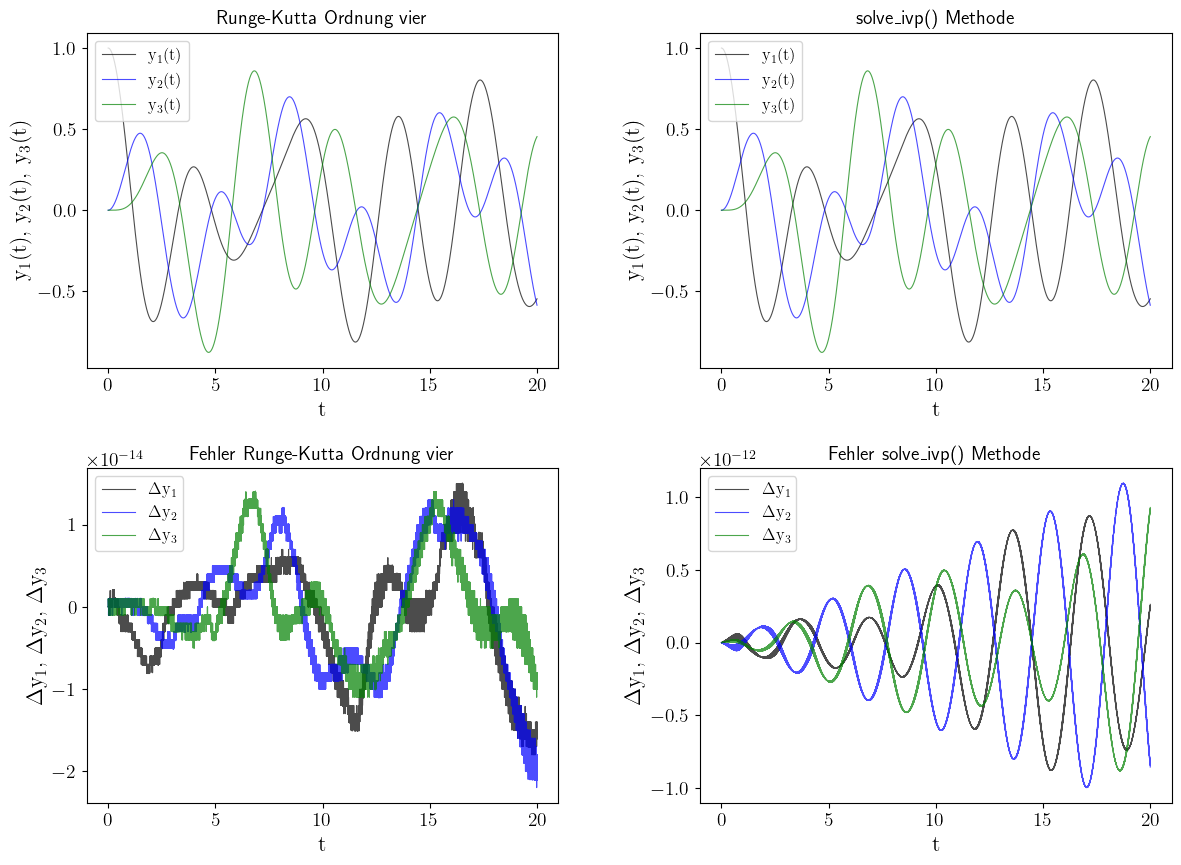

In [70]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Runge-Kutta Ordnung vier')              # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax2.set_title(r'solve_ivp() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax3.set_title(r'Fehler Runge-Kutta Ordnung vier')       # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2, \, \Delta y_3$")
ax4.set_title(r'Fehler solve_ivp() Methode')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2, \, \Delta y_3$")

l_width = 0.8                                          # Festlegung der Plot-Liniendicke  
alp = 0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_1(t)$')
ax1.plot(data[:,1],data[:,3], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_2(t)$')
ax1.plot(data[:,1],data[:,4], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_3(t)$')

ax2.plot(Loes.t, Loes.y[0],c="black", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_1(t)$");
ax2.plot(Loes.t, Loes.y[1],c="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_2(t)$");
ax2.plot(Loes.t, Loes.y[2],c="green", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_3(t)$");

ax3.plot(data[:,1],data[:,5]-data[:,2], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1$') 
ax3.plot(data[:,1],data[:,6]-data[:,3], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2$') 
ax3.plot(data[:,1],data[:,7]-data[:,4], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_3$') 

ax4.plot(data[:,1],data[:,5]-Loes.y[0], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1$') 
ax4.plot(data[:,1],data[:,6]-Loes.y[1], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2$') 
ax4.plot(data[:,1],data[:,7]-Loes.y[2], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_3$') 

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

### Beispiel: n-Perlen (n=200)

Wir schreiben nun das Python-Programm auf eine Simulation einer Kette mit beliebig vielen Perlen um ($n$-Perlen) und betrachten speziell eine Simulation mit $n=200$ Perlen. Den Grenzfall $n \rightarrow \infty$ bezeichnet man als <i>die schwingende Saite</i>.

In [71]:
n=200
m = []
a = []
T = []
for i in range(0,2*n):
    m.append(1)
    a.append(1)
    T.append(1)

Die Anfangsauslenkung der Kette sei so gewählt, dass sie im mittleren Bereich in positive Richtung wie eine Gauß-Verteilung ausgelenkt sei.

In [72]:
u_init = []
for i in range(0,n):
    u_init.append(np.exp(-1/2*((i-100)/5)**2))
for i in range(0,n):
    u_init.append(0)

Wir definieren uns das allgemeine System der 2n-DGLs als eine Funktion

In [73]:
def DGLsys(t,u_vec):
    du_dt = []
    for i in range(0,n):
        du_dt.append(u_vec[n+i])
    du_dt.append(T[0]/(m[0]*a[0])*(u_vec[1] - 2*u_vec[0]))
    for i in range(n+1,2*n-1):
        du_dt.append(T[i-n]/(m[i-n]*a[i-n])*(u_vec[i-n-1] - 2*u_vec[i-n] + u_vec[i-n+1]))
    du_dt.append(T[n-1]/(m[n-1]*a[n-1])*(u_vec[n-2]-2*u_vec[n-1]))
    return du_dt

lösen es numerisch

In [74]:
t_end=220
fehler = 10**(-13)
N=100000
t_val = np.linspace(0, t_end, N+1)
Loes = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, rtol=fehler, atol=fehler)

und stellen es uns als Animation dar:

In [75]:
params = {
    'figure.figsize'    : [10,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

In [76]:
step = int(N/150)
r_p =10
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,Loes.y[0][step*i]], c="grey")
    ax.plot([n,n+1],[Loes.y[n-1][step*i],0], c="grey")
    ax.scatter(n, Loes.y[n-1][step*i], s=r_p, marker='o', c="blue")
    for l in range(1,n):
        ax.scatter(l, Loes.y[l-1][step*i], s=r_p, marker='o', c="blue")
        ax.plot([l,l+1],[Loes.y[l-1][step*i],Loes.y[l][step*i]], c="grey")
    ax.set_xlim(0, n+1)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Falls Sie diese numerische Lösung auch mit den Resultaten eines C++ Programms vergleichen möchten, finden Sie das entsprechende C++ Programm (Simulation einer Kette mit beliebig vielen Perlen) unter dem folgenden Link: <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/SchwingendeKette.cpp" target="_blank">SchwingendeKette.cpp</A>

Die Simulation mit $N=200$ wurde speziel mit dem folgenden C++ Programm simuliert: <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/SchwingendeKette_200P.cpp" target="_blank">SchwingendeKette_200P.cpp</A>

Eine Beschreibung der C++ Programme und Zusammenfassung des gesamten Projektes <i>Die schwingende Kette</i> finden Sie unter dem folgenden Link: <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/V10/DieSchwingendeKette.html" target="_blank">Die schwingende Kette</A>